In [1]:
using Printf
using PyPlot
using LinearAlgebra
using IJulia
using FileIO
using ImageMagick

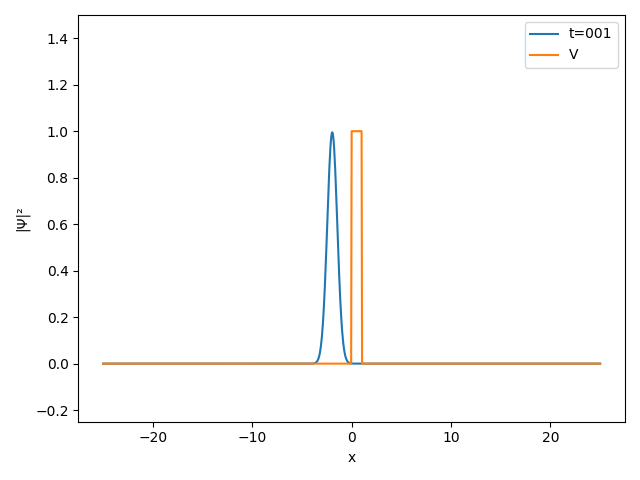

In [2]:
# Barrier Potential
# x- domain and the barrier potential
L, N = 25, 1001; # Length of x-domain, Number of discrete points
dx = (2*L)/N;    # step length
x = range(-L, stop=L, length=N);   # position array
V = ifelse.((x .< 0) .| (x .> 1), 0, 1);    # Barrier Potential array

# The Gaussian Wave packet
mu, sig, k = -2, 1, 1.0;
fpsi(x) = exp(-(x-mu)^2/sig+1im*k*x);
psi = fpsi.(x);

# The parameters
dt = 0.05; # Time step
a = 1im*dt/2;
b = a/(2*dx^2);
# h-cut is chosen to be 1

#construction of A and B matrices
d = 2b .+ a .* V[2:end-1];  # length of diagonal = (N-2)
d = 2b .+ a .* V[2:end-1]; # length of diagonal = (N-2)
d1 = b .* ones(N-3); # length of off-diagonal = (N-3)
A = diagm(-1 => -d1, 0 => 1 .+ d, 1 => .-d1);
B = diagm(-1 => d1, 0 => 1 .- d, 1 => d1);


C = inv(A)*B; # solving A^(-1)B

filenames = [];
images = [];
#For time evolution and animation
for t=1:150
    PyPlot.clf();
    psi[2:end-1] = C*psi[2:end-1];
    PyPlot.plot(x, abs2.(psi), label="t=$(lpad(t, 3, '0'))")[1];
    PyPlot.xlabel("x");
    PyPlot.ylabel("|Ψ|²");
    PyPlot.ylim(-0.25, 1.5);
    PyPlot.plot(x, V, label="V"); # Plot the barrier potential
    PyPlot.legend();
    PyPlot.tight_layout();
    
    fname = "tdse_barr_$(@sprintf("%03d", t)).png";
    PyPlot.savefig(fname);
    push!(filenames, fname);   # saving plots at each time as a frame
    PyPlot.close();
end

for filename in filenames
    push!(images, load(filename));
end
save("tdse_barr.gif", cat(images..., dims=3), fps=100);   # combining all frame to make gif
for filename in filenames
    if isfile(filename)
        rm(filename);   # deletes the .png frames
    end
end
display("image/gif", read("tdse_barr.gif"));